In this blog post, I will use the Seaborn "Car Crashes" dataset in order to group similar states together and observe patterns with motor accidents in these states. 

# Get and Examine the Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.get_dataset_names()
crashes = sns.load_dataset('car_crashes')
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


We see that this dataset contains various details about accidents, like whether the driver was speeding or intoxicated. There is also the abbrev column, which indicates the state in which the accident took place. 

In [2]:
crashes.shape
crashes[crashes['abbrev'] == "DC"]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
8,5.9,2.006,1.593,5.9,5.9,1273.89,136.05,DC


The reason there are 51 rows is because the 50 states along with DC are included. Now, let's check for missing or invalid data. 

In [3]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [4]:
crashes.isna().any().any()

False

Looks like there is no missing data. We can now perform a few checks on whether the data makes sense. 


In [5]:
crashes['total'].min()
crashes['speeding'].min()
crashes['alcohol'].min()
crashes['not_distracted'].min()
crashes['no_previous'].min()
crashes['ins_premium'].min()
crashes['ins_losses'].min()

82.75

It looks like the data is valid, so we are good to proceed. Let's first visualize the total column for each of the states. To make the barplot less cluttered, let's focus on the 5 states with the highest number of crashes and the 5 states with the lowest number of crashes. 

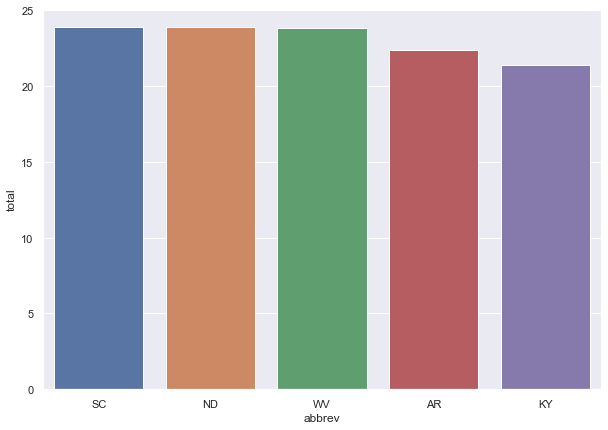

In [12]:
crashes_sorted = crashes.sort_values('total', ascending=False)
crashes_sorted
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=crashes_sorted[:5], x='abbrev', y='total', ax=ax)

plt.show()

The states which have the highest number of crashes are South Carolina, North Dakota, West Virginia, Arkansas, and Kentucky. 

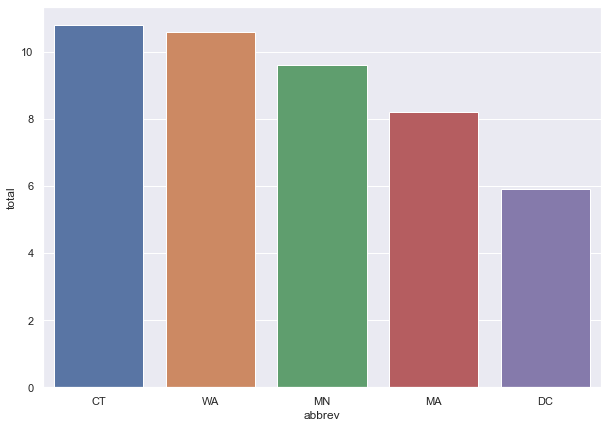

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=crashes_sorted[-5:], x='abbrev', y='total')

plt.show()

On the other end of the spectrum, Connecticut, Washington state, Minnesota, Massachussetts, and DC have the fewest crashes. 